In [8]:
dap_path = 'http://pydap.solab.rshu.ru/model/ncep/gfs/gfs.2015031006/gfs.t06z.master.grbf000.10m.uv.grib2'

In [6]:
from pydap.client import open_url
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
dataset = open_url(dap_path)

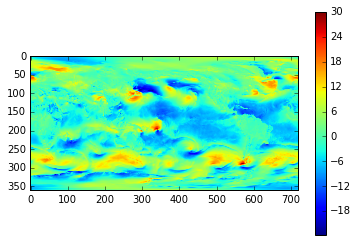

In [10]:
ws = dataset['UGRD_P0_L103_GLL0']
imshow(ws)
colorbar()


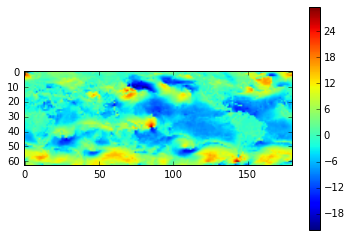

In [27]:
imshow(ws[50:300:4, ::4])
colorbar()

In [13]:
def _calculate_steps(resolution):
    res = float(resolution)

    if res > 20000:
        res = 20000

    # here starts the magic
    offset = int(math.log(res, 10) * math.log(res, 10) / 4)
    latstep = int(res / 1000 + offset)
    if latstep < 1:
        latstep = 1
    lonstep = int(latstep * 0.5)
    if lonstep < 1:
        lonstep = 1
    return latstep, lonstep

In [18]:
_calculate_steps(2400)

(4, 2)

In [ ]:
while np.min(lon) < x1:
    # Retrieve only the data for the request bbox

    i_indexes = find_containing_bounds(lon, x0, x1)
    j_indexes = find_containing_bounds(lat, y0, y1)
    i0, i1 = min(i_indexes), max(i_indexes)
    j0, j1 = min(j_indexes), max(j_indexes)

    istep, jstep = self._calculate_steps(resolution)

    # make a grid and transform to a destination projection
    xv, yv = np.meshgrid(lon[i0:i1:istep], lat[j0:j1:jstep])
    xv, yv = self.projection.transform(xv, yv)

    for grid in self.grids:
        data = np.asarray(raw_data[grid.id][...,j0:j1:jstep,i0:i1:istep])

        if data.shape:
            # reduce dimensions and mask missing_values
            grid.filtered_data = fix_data(data, grid.attributes)

    features = self.renderer.data_to_features(self.grids, lons=xv, lats=yv)

    lon += 360.0

result = GeoJSON(crs = self.projection.crs)
return result.encode(features, False)